In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import matplotlib.gridspec as gridspec
import random

In [4]:
cmapPool = ['viridis', 'plasma', 'inferno', 'cool', 'hot', 'spring', 'autumn', 'twilight', 'summer']

In [21]:
def phasePathLinear(fooData, nameData):
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]

    fig = plt.figure(figsize=(7, 9))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
    
    for i in range(len(fooData)):
    # Original system
        U = fooData[i][0] * X + fooData[i][1] * Y
        V = fooData[i][2] * X + fooData[i][3] * Y

        ax = fig.add_subplot(gs[0, i])
        strm = ax.streamplot(X, Y, U, V, color = U * U + V * V, linewidth=1, cmap=random.choice(cmapPool))
        ax.set_title(nameData[i])

    plt.tight_layout()
    plt.show()

# Task 1
credits to pyplot tutorials

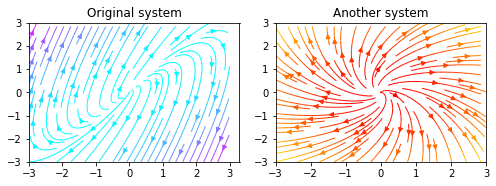

In [22]:
fooData = [[-2, 4, -10, 10], [4, 2, -2, 4]]
nameData = ["Original system", "Another system"]
phasePathLinear(fooData, nameData)

# Task 3

### b.
Let's draw phase path with $s = 12.5$

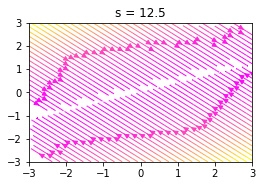

In [29]:
def phasePathSingular():
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]

    fig = plt.figure(figsize=(7, 9))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
    
    # system with zeroed eighnvalue
    U = -5 * X + 12.5 * Y
    V = 4 * X - 10 * Y

    ax = fig.add_subplot(gs[0, 1])
    strm = ax.streamplot(X, Y, U, V, color = U * U + V * V, linewidth=1, cmap=random.choice(cmapPool))
    ax.set_title("s = 12.5")

    plt.tight_layout()
    plt.show()
phasePathSingular()

### c.

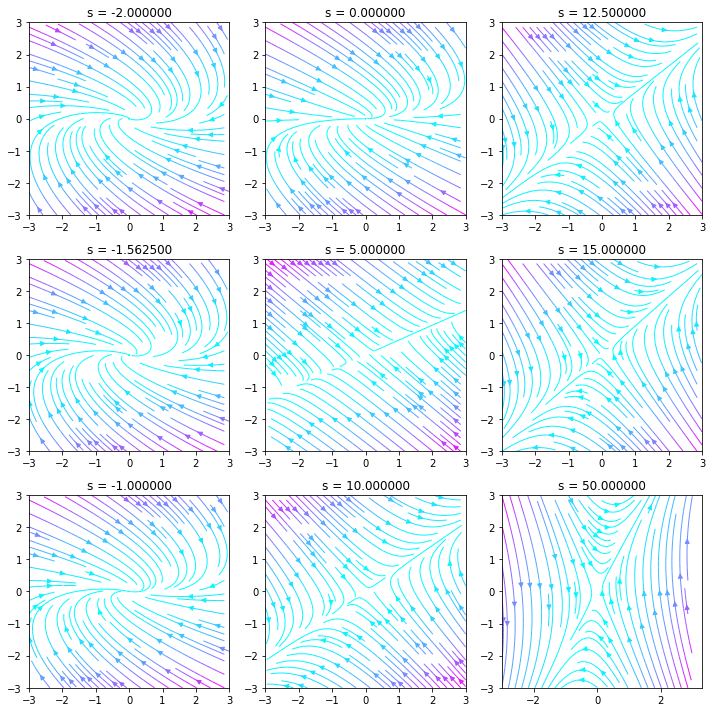

In [14]:
def phasePathAnimation():
    w = 3
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]

    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(nrows=3, ncols=3)
    
    it = 0
    color = random.choice(cmapPool)
    for s in [-2, -25/16, -1, 0, 5, 10, 12.5, 15, 50]:
        U = -5 * X + 12.5 * Y
        V = s * X - 10 * Y

        ax = fig.add_subplot(gs[it % 3, it // 3])
        strm = ax.streamplot(X, Y, U, V, color = U * U + V * V, linewidth=1, cmap=color)
        ax.set_title("s = %2f" % s)
        
        it += 1

    plt.tight_layout()
    plt.show()
phasePathAnimation()

# Task 4

### a. (normal system)

In [102]:
def phasePathCustom(nameData, wides):
    for i in range(len(wides)):
        w = wides[i]
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]

        fig = plt.figure(figsize=(7, 9))
        gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

        # Original system
        U = np.sin(X) + np.exp(Y) - 1
        V = np.sin(X - Y)

        ax = fig.add_subplot(gs[0, i])
        strm = ax.streamplot(X, Y, U, V, color = U * U + V * V, linewidth=1, cmap=random.choice(cmapPool))
        ax.set_title(nameData[i])

    plt.tight_layout()
    plt.show()

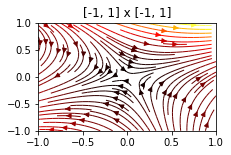

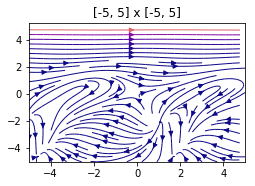

In [111]:
nameData = ["[-1, 1] x [-1, 1]", "[-5, 5] x [-5, 5]"]
wides = [1, 5]
phasePathCustom(nameData, wides)

### c. (linear system)

In [114]:
def phasePathCustomLinear(nameData, wides):
    for i in range(len(wides)):
        w = wides[i]
        Y, X = np.mgrid[-w:w:100j, -w:w:100j]

        fig = plt.figure(figsize=(7, 9))
        gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

        # Original system
        U = X + Y
        V = X - Y

        ax = fig.add_subplot(gs[0, i])
        strm = ax.streamplot(X, Y, U, V, color = U * U + V * V, linewidth=1, cmap=random.choice(cmapPool))
        ax.set_title(nameData[i])

    plt.tight_layout()
    plt.show()

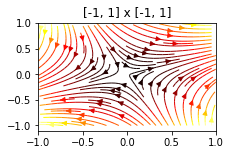

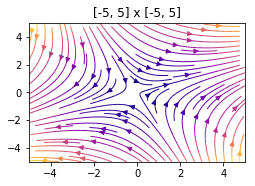

In [116]:
nameData = ["[-1, 1] x [-1, 1]", "[-5, 5] x [-5, 5]"]
wides = [1, 5]
phasePathCustomLinear(nameData, wides)

### d.

In [2]:
def x_der(x, y):
    return np.sin(x) + np.exp(y) - 1
def y_der(x, y):
    return np.sin(x - y)

Запустим наш описанный алгоритм с разными дельта (размер шага вдоль градиента):

In [127]:
for d in (0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001):
    grad = (1 + 2**0.5, 1)
    curX, curY = 0, 0
    while curX < 5:
        curX += grad[0] * d
        curY += grad[1] * d
        grad = (x_der(curX, curY), y_der(curX, curY))

    print("Delta =", d, "Y-coord =", curY)

Delta = 0.1 Y-coord = 1.696237898480992
Delta = 0.01 Y-coord = 1.6322256749207888
Delta = 0.001 Y-coord = 1.6258126750279742
Delta = 0.0001 Y-coord = 1.625084729726163
Delta = 1e-05 Y-coord = 1.6250309711562938
Delta = 1e-06 Y-coord = 1.625025322268116


In [11]:
for d in (0.1, 0.01, 0.001):
    grad = (1 + 2**0.5 + 0.01, 1)
    curX, curY = 0, 0
    for i in range(10000000):
        curX += grad[0] * d
        curY += grad[1] * d
        grad = (x_der(curX, curY), y_der(curX, curY))

    print("Delta =", d, "X-coord =", curX, "Y-coord =", curY)

Delta = 0.1 X-coord = 34251378.1977074 Y-coord = 3.574999782647223
Delta = 0.01 X-coord = 33859712.65809585 Y-coord = 5.83409905658759
Delta = 0.001 X-coord = 16551120.148150872 Y-coord = 7.8609532142816185
